In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
%matplotlib inline
import scipy.stats as stats
import statsmodels as sm
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# Data Load In 

In [2]:
import Scripts_SigNonSig_V2
reload(Scripts_SigNonSig_V2)
from Scripts_SigNonSig_V2 import * 

In [4]:
out = get_data_for_sig_nonsig_analyses(version='v8b')
df_50_nonsig = out['df_50_nonsig']
df_50_sig = out['df_50_sig']

Scripts_SigNonSig_V2.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_simple_one_region = data_simple_one_region[np.logical_not(np.isnan(df.loc[:,'Accuracy.50']))]
Scripts_SigNonSig_V2.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  region_data_single_row['Accuracy.50'] = np.mean(region_data['Accuracy.50'])


# Boot-Strap Both Distributions

In [5]:
import Scripts_Hierarchical_Boot_V2
reload(Scripts_Hierarchical_Boot_V2)
from Scripts_Hierarchical_Boot_V2 import * 

/Users/chris/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
hierarchical_boot(df_50_sig,savetitle='sig_v8b',save=True)

{'mean': array([ 0.6185344 ,  0.604704  ,  0.62234916, ...,  0.60653767,
         0.59824694,  0.61965833]),
 'perc95': array([ 0.79 ,  0.73 ,  0.794, ...,  0.77 ,  0.77 ,  0.8  ])}

In [7]:
hierarchical_boot(df_50_nonsig,savetitle='nonsig_v8b',save=True)

{'mean': array([ 0.51475445,  0.51080224,  0.52142013, ...,  0.51517003,
         0.52124522,  0.5161271 ]),
 'perc95': array([ 0.55   ,  0.56   ,  0.583  , ...,  0.56134,  0.58   ,  0.57   ])}

# Load Back In 

In [8]:
boot_results_sig = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_sig_v8b.npz')
boot_results_nonsig = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_nonsig_v8b.npz')

In [9]:
x = np.linspace(0,1,100) # what range for cdf # 
epcdf_store_sig = boot_results_sig['epcdf_store']
eppdf_store_sig = boot_results_sig['eppdf_store']
meann = boot_results_sig['meann']
mediann = boot_results_sig['mediann']
prob_less_than_62= boot_results_sig['prob_less_than_62']

epcdf_store_non = boot_results_nonsig['epcdf_store']
eppdf_store_non = boot_results_nonsig['eppdf_store']
meann_non = boot_results_nonsig['meann']
mediann_non = boot_results_nonsig['mediann']
sig_thresh1 = boot_results_nonsig['perc95']

#prob_less_than_95 = boot

# CDF and PDF Plots 

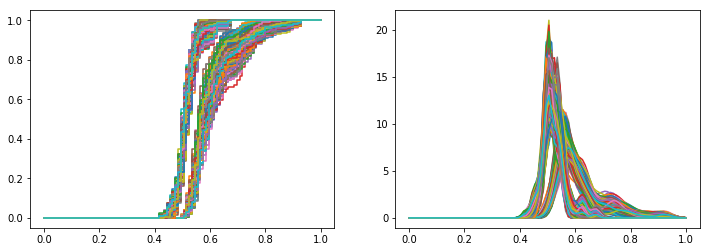

In [10]:
# newer 
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.step(x, epcdf_store_sig.T);
ax1.step(x, epcdf_store_non.T);

ax2.plot(x, eppdf_store_sig.T);
ax2.plot(x, eppdf_store_non.T);

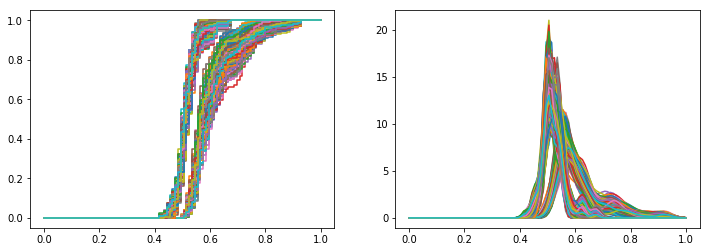

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.step(x, epcdf_store_sig.T);
ax1.step(x, epcdf_store_non.T);

ax2.plot(x, eppdf_store_sig.T);
ax2.plot(x, eppdf_store_non.T);

Text(0.5,0.98,u'Distribution of Accuracies-Boot-strapped CI')

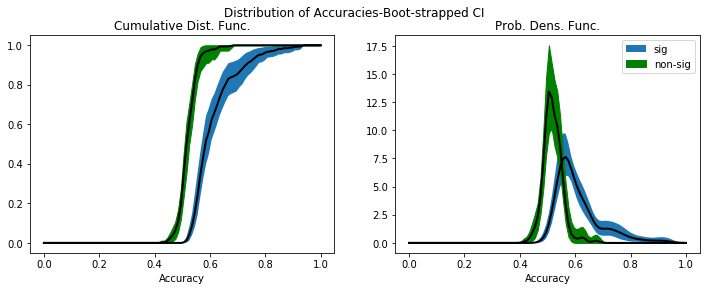

In [12]:
epcdf_store_non[0,:]
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

# significant 
upci = np.percentile(epcdf_store_sig,97.5,axis=0)
loci = np.percentile(epcdf_store_sig,2.5,axis=0)
ax1.plot(x,np.mean(epcdf_store_sig,axis=0),linewidth=2,color='black')
ax1.fill_between(x,upci,loci)

# non significant 
upci = np.percentile(epcdf_store_non,97.5,axis=0)
loci = np.percentile(epcdf_store_non,2.5,axis=0)
ax1.plot(x,np.mean(epcdf_store_non,axis=0),linewidth=2,color='black')
ax1.fill_between(x,upci,loci,color='green')

##### PDF 

# significant 
upci = np.percentile(eppdf_store_sig,97.5,axis=0)
loci = np.percentile(eppdf_store_sig,2.5,axis=0)
ax2.plot(x,np.mean(eppdf_store_sig,axis=0),linewidth=2,color='black')
ax2.fill_between(x,upci,loci,label='sig')

# non significant 
upci = np.percentile(eppdf_store_non,97.5,axis=0)
loci = np.percentile(eppdf_store_non,2.5,axis=0)
ax2.plot(x,np.mean(eppdf_store_non,axis=0),linewidth=2,color='black')
ax2.fill_between(x,upci,loci,color='green',label='non-sig')

ax1.set_title('Cumulative Dist. Func.')
ax2.set_title('Prob. Dens. Func.')

ax1.set_xlabel('Accuracy')
ax2.set_xlabel('Accuracy')
plt.legend()
plt.suptitle('Distribution of Accuracies-Boot-strapped CI',fontsize=12)
#plt.tight_layout()
#plt.savefig('distributions_cdf_pdf_boot_signon.png')


In [13]:
#len(df_50_sig)

In [15]:
print('prob less than 62')
print(np.percentile(prob_less_than_62,95))
print(np.mean(prob_less_than_62))
print(np.percentile(prob_less_than_62,5))

print('mean')
print(np.percentile(meann,95))
print(np.mean(meann))
print(np.percentile(meann,5))

print('median')
print(np.percentile(mediann,95))
print(np.mean(mediann))
print(np.percentile(mediann,5))

print('mean_non')
print(np.percentile(meann_non,95))
print(np.mean(meann_non))
print(np.percentile(meann_non,5))

print('median_non')
print(np.percentile(mediann_non,95))
print(np.mean(mediann_non))
print(np.percentile(mediann_non,5))

print('thresh 1')
print(np.percentile(sig_thresh1,95))
print(np.mean(sig_thresh1))
print(np.percentile(sig_thresh1,5))

# print('thresh 2')
# print(np.percentile(sig_thresh2,95))
# print(np.mean(sig_thresh2))
# print(np.percentile(sig_thresh2,5))

# print('prob less thresh 1')
# print(np.percentile(prob_less_than_thresh1,95))
# print(np.mean(prob_less_than_thresh1))
# print(np.percentile(prob_less_than_thresh1,5))

#print('prob less thresh 2')
#print(np.percentile(prob_less_than_thresh2,95))
#print(np.mean(prob_less_than_thresh2))
#print(np.percentile(prob_less_than_thresh2,5))

prob less than 62
0.74293426519
0.661293536413
0.579154648677
mean
0.627179794116
0.609757026893
0.593097256652
median
0.6
0.58421525
0.57
mean_non
0.52765280524
0.519303929164
0.512852144948
median_non
0.52
0.51548375
0.51
thresh 1
0.62
0.5728117025
0.555
